# Mortality Data Documentation for county level

## Importing Packages

In [1]:
# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')


## Reading Data

In [2]:
mortality_c=pd.read_csv('/Users/sumeetmishra/Desktop/CNS/CDCMortality/Data/NCHS_-_Drug_Poisoning_Mortality_by_County__United_States.csv')
mortality_c.head(15)

,FIPS,Year,State,FIPS State,County,Population,"Estimated Age-adjusted Death Rate, 16 Categories (in ranges)"
0,1001,1999,Alabama,1,"Autauga County, AL","42,963",2-3.9
1,1001,2000,Alabama,1,"Autauga County, AL","44,021",4-5.9
2,1001,2001,Alabama,1,"Autauga County, AL","44,889",4-5.9
3,1001,2002,Alabama,1,"Autauga County, AL","45,909",4-5.9
4,1001,2003,Alabama,1,"Autauga County, AL","46,800",4-5.9
5,1001,2004,Alabama,1,"Autauga County, AL","48,366",4-5.9
6,1001,2005,Alabama,1,"Autauga County, AL","49,676",4-5.9
7,1001,2006,Alabama,1,"Autauga County, AL","51,328",6-7.9
8,1001,2007,Alabama,1,"Autauga County, AL","52,405",6-7.9
9,1001,2008,Alabama,1,"Autauga County, AL","53,277",6-7.9


## Looking at Data types

In [3]:
mortality_c.dtypes

FIPS                                                             int64
Year                                                             int64
State                                                           object
FIPS State                                                       int64
County                                                          object
Population                                                      object
Estimated Age-adjusted Death Rate, 16 Categories (in ranges)    object
dtype: object

## Cleaning data and changing data types

In [4]:
mortality_c['Population'] = mortality_c['Population'].str.replace(',','').astype(int)
mortality_c.head()

mortality_c = mortality_c.convert_objects(convert_numeric=True)
mortality_c.dtypes


/Users/sumeetmishra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


FIPS                                                             int64
Year                                                             int64
State                                                           object
FIPS State                                                       int64
County                                                          object
Population                                                       int64
Estimated Age-adjusted Death Rate, 16 Categories (in ranges)    object
dtype: object

## Renaming column header with a suitable one

In [5]:
mortality_c.rename(columns={'Estimated Age-adjusted Death Rate, 16 Categories (in ranges)':'Estimated_Age_Adjusted_Death_Rate'}, 
                 inplace=True)


## Looking at the modified data

In [6]:
mortality_c.head(15)

,FIPS,Year,State,FIPS State,County,Population,Estimated_Age_Adjusted_Death_Rate
0,1001,1999,Alabama,1,"Autauga County, AL",42963,2-3.9
1,1001,2000,Alabama,1,"Autauga County, AL",44021,4-5.9
2,1001,2001,Alabama,1,"Autauga County, AL",44889,4-5.9
3,1001,2002,Alabama,1,"Autauga County, AL",45909,4-5.9
4,1001,2003,Alabama,1,"Autauga County, AL",46800,4-5.9
5,1001,2004,Alabama,1,"Autauga County, AL",48366,4-5.9
6,1001,2005,Alabama,1,"Autauga County, AL",49676,4-5.9
7,1001,2006,Alabama,1,"Autauga County, AL",51328,6-7.9
8,1001,2007,Alabama,1,"Autauga County, AL",52405,6-7.9
9,1001,2008,Alabama,1,"Autauga County, AL",53277,6-7.9


## Plotting histogram for FIPS(different for each county)

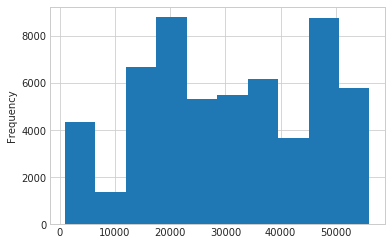

In [7]:
mortality_c.FIPS.plot.hist()


## Checking if any missing values

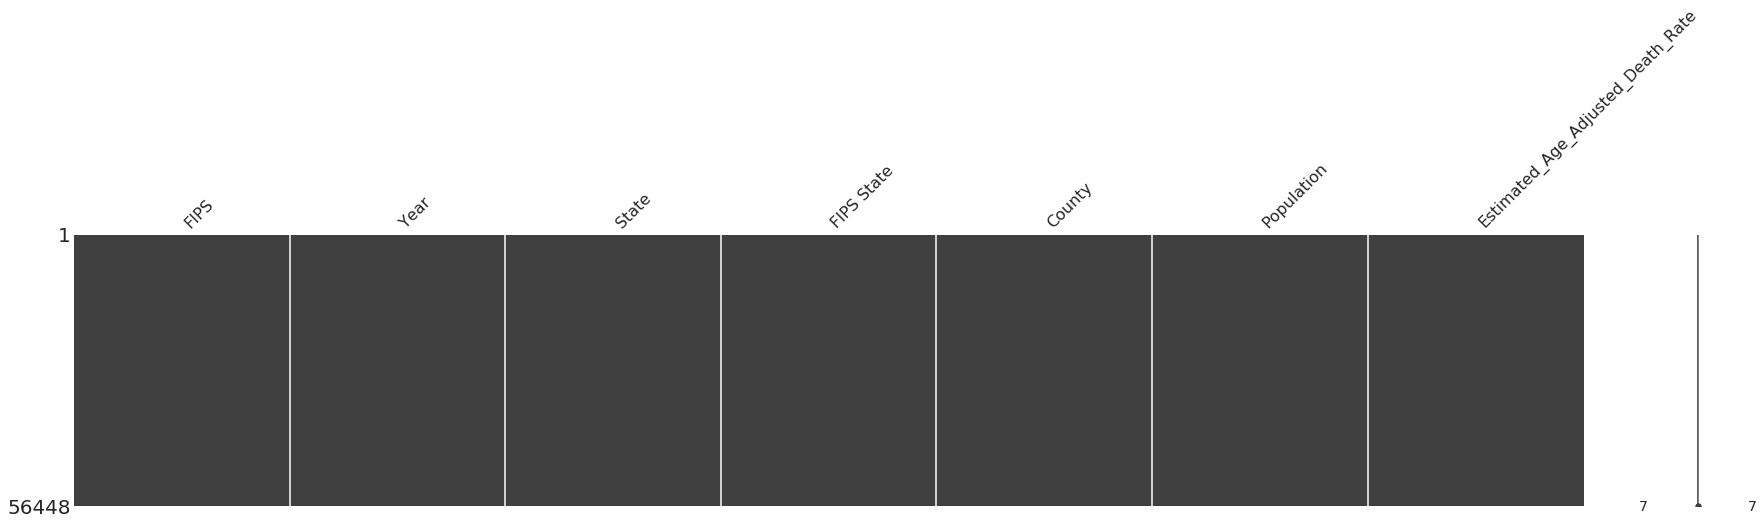

In [8]:
missingno.matrix(mortality_c, figsize = (30,5))



## Data Exploration-Univariate

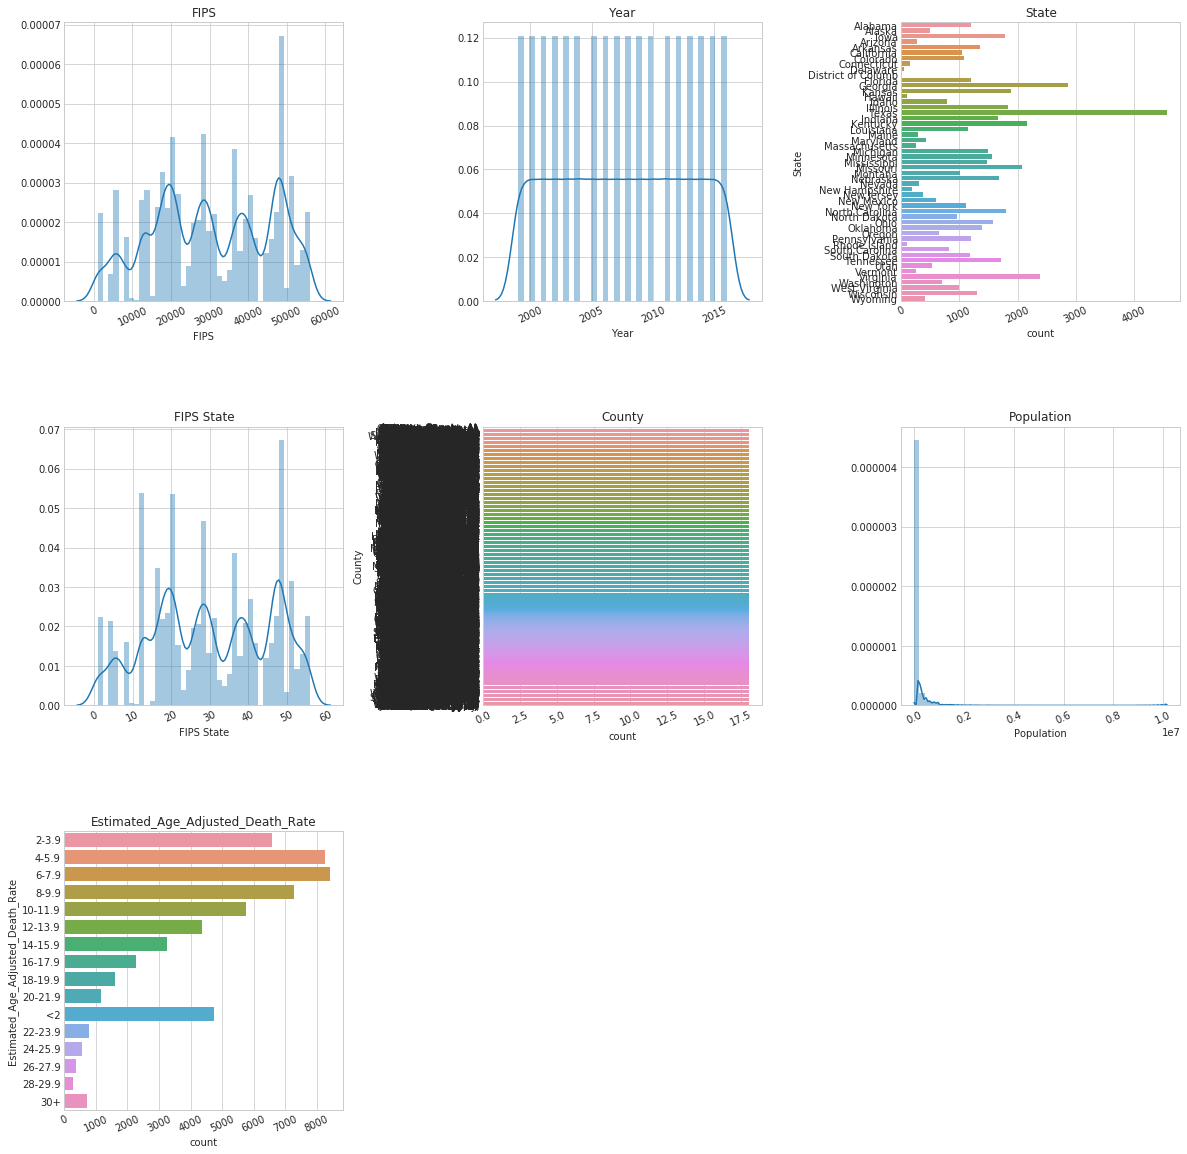

In [ ]:
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
plot_distribution(mortality_c, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)


## Checking if any Null values in data

In [ ]:
mortality_c.isnull().sum()


FIPS                                 0
Year                                 0
State                                0
FIPS State                           0
County                               0
Population                           0
Estimated_Age_Adjusted_Death_Rate    0
dtype: int64

## Data Description

In [ ]:
mortality_c.describe()


,FIPS,Year,FIPS State,Population
count,56448.000000,56448.000000,56448.000000,5.644800e+04
mean,30430.185587,2007.500000,30.326531,9.633207e+04
std,15136.822130,5.188173,15.118709,3.108950e+05
min,1001.000000,1999.000000,1.000000,5.500000e+01
25%,19002.500000,2003.000000,19.000000,1.109175e+04
50%,29182.000000,2007.500000,29.000000,2.543550e+04
75%,45083.500000,2012.000000,45.000000,6.508900e+04
max,56045.000000,2016.000000,56.000000,1.017029e+07


## Looking at statewise count data

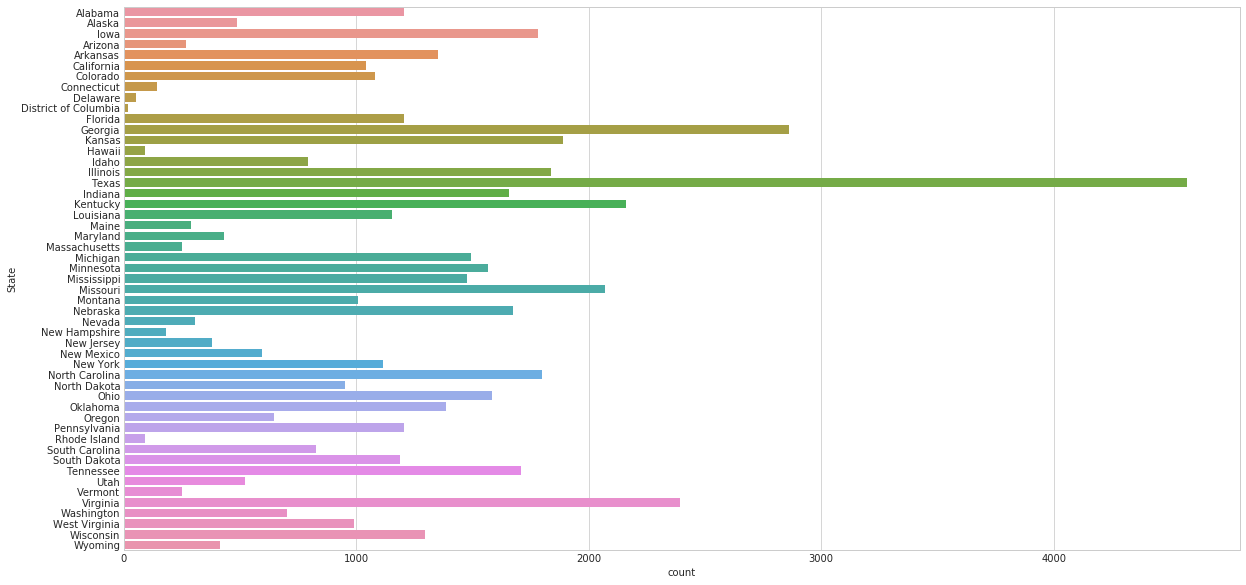

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,10)) 
sns.countplot(y="State", data=mortality_c)

## Looking at countywise population

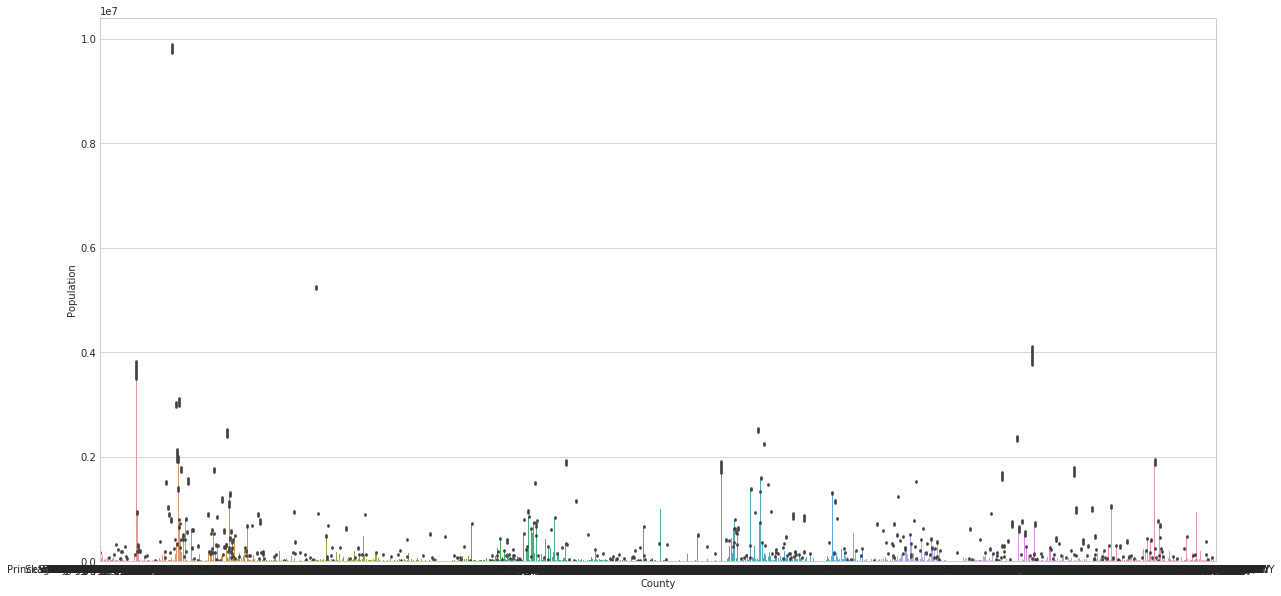

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,10)) 
sns.barplot(y="Population",x="County", data=mortality_c)

## State Population

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,10)) 
sns.countplot(y="State", data=mortality_c)
sns.barplot(x="Population",y="FIPS State", data=mortality_c)